In [9]:
import itertools
import os
import json
import copy
import sys
from collections import defaultdict
import itertools
import pandas as pd
from tqdm.notebook import tqdm
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn import linear_model
import seaborn as sns
import random
import seaborn as sns
import scipy.stats as stats
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
#import seaborn as sns
import seaborn as sns
from matplotlib import rcParams
import scipy
from scipy import stats
import seaborn as sns
from scipy import stats
import sys
import seaborn as sns
from utils import *
import numpy as np
pd.set_option('display.max_rows', 500)
#

In [10]:
AVAILBLE_DATASETS = ['DIALOG_pc.csv','DIALOG_tc.csv','FLICKR.csv','MLQE.csv','REAL_SUM.csv','SUM_EVAL.csv','TAC_08.csv','TAC_09.csv','TAC_11.csv']

In [11]:
metric = {
    'human':[],
    'alpha': [],
    'mse': [],
    'ds': []
}
df_sys= pd.DataFrame()
for ds in AVAILBLE_DATASETS:
    ds_ = ds.replace('.csv','')
    df_ = pd.read_csv(f'df_mse/{ds_}.csv_sys.csv')
    ds_ = ds.replace('.csv','')
    human_metrics= list(set([
        i.replace(ds_,'').replace('w_','').replace('_','') for i in list(set(df_.metric))]))
    if len(human_metrics) > 1:
        print('DS',ds_)
        for human_metric in human_metrics:
            print(human_metric)
            values = 100 * (df_[df_.metric == f'{human_metric}']['mse'].values- df_[
                df_.metric == f'w_{human_metric}']['mse'].values)/ (df_[
                df_.metric == f'w_{human_metric}']['mse'].values)
            df_.loc[df_.metric == f'{human_metric}']['diff_mse'] = values
            metric['human'] += [f'{ds_}_{human_metric}'] * len(values)
            metric['ds'] += [ds_] * len(values)
            metric['alpha'] += df_[df_.metric == f'{human_metric}']['alpha'].values.tolist()
            metric['mse'] += (-values).tolist()

df_sys= pd.DataFrame(metric).round(1)


DS DIALOG_pc
Hoverall
Hnatural
Hengaging
Hcontext
Hunderstandable
Huseknowledge
DS DIALOG_tc
Hoverall
Hnatural
Hengaging
Hcontext
Hunderstandable
Huseknowledge
DS SUM_EVAL
Hfluency
Hconsistency
Hcoherence
Hrelevance
DS TAC_08
Hpyr
Hresp
DS TAC_09
Hpyr
Hresp
DS TAC_11
Hpyr
Hresp


/var/folders/49/yzllcjl93rbc47nkmb2kb9z80000gp/T/ipykernel_6540/3981485454.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_.loc[df_.metric == f'{human_metric}']['diff_mse'] = values


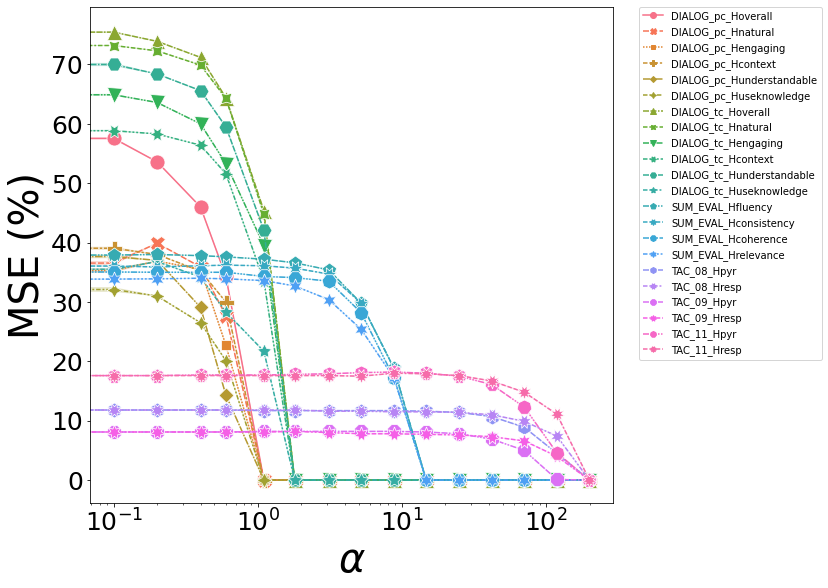

In [12]:
if True:
    fig,ax = plt.subplots(figsize=(11.7,8.27))
    ax = sns.lineplot(data=df_sys, x="alpha", y="mse", hue="human",style="human", markers=True, markersize=15)
    ax.set_xscale('log')
    plt.setp(ax.get_xticklabels(), fontsize=25,ha='center')
    plt.setp(ax.get_yticklabels(), fontsize=25)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.xlabel('$\\alpha$', fontsize=40)
    plt.ylabel('MSE (%)', fontsize=40)
    plt.tight_layout()
    plt.savefig(f'all_agg_mse_error_sys.pdf', format = 'pdf')

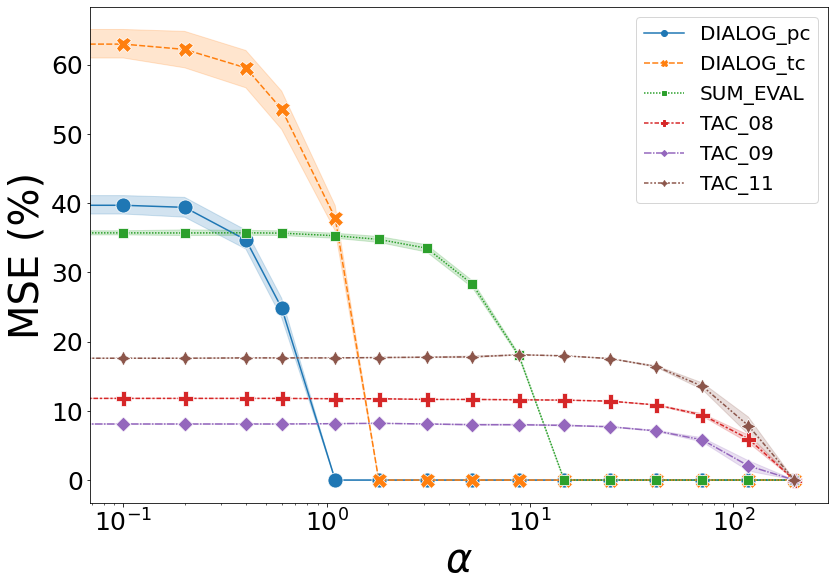

In [13]:
if True:
    fig,ax = plt.subplots(figsize=(11.7,8.27))
    ax = sns.lineplot(data=df_sys, x="alpha", y="mse", hue="ds", style="ds", markers=True, markersize=15)
    ax.set_xscale('log')
    plt.setp(ax.get_xticklabels(), fontsize=25,ha='center')
    plt.setp(ax.get_yticklabels(), fontsize=25)
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('$\\alpha$', fontsize=40)
    lgd = plt.legend(prop={'size': 20})
    plt.ylabel('MSE (%)', fontsize=40)
    plt.tight_layout()
    plt.savefig(f'agg_mse_error_sys.pdf', format = 'pdf')

In [14]:
metric = {
    'human':[],
    'alpha': [],
    'mse': [],
    'ds': []
}
df_sys= pd.DataFrame()
for ds in AVAILBLE_DATASETS:
    if ds != 'MLQE.csv':
        ds_ = ds.replace('.csv','')
        df_ = pd.read_csv(f'df_mse/{ds_}.csv_utt.csv')
        ds_ = ds.replace('.csv','')
        human_metrics= list(set([
            i.replace(ds_,'').replace('w_','').replace('_','') for i in list(set(df_.metric))]))
        if len(human_metrics) > 1:
            print('DS',ds_)
            for human_metric in human_metrics:
                print(human_metric)
                values = 100*(df_[df_.metric == f'{human_metric}']['mse'].values- df_[
                    df_.metric == f'w_{human_metric}']['mse'].values)/(df_[
                    df_.metric == f'w_{human_metric}']['mse'].values)
                df_.loc[df_.metric == f'{human_metric}']['diff_mse'] = values
                metric['human'] += [f'{ds_}_{human_metric}'] * len(values)
                metric['ds'] += [ds_] * len(values)
                metric['alpha'] += df_[df_.metric == f'{human_metric}']['alpha'].values.tolist()
                metric['mse'] += (-values).tolist()

df_utt= pd.DataFrame(metric).round(1)
l_alpha = sorted(list(set(df_utt.alpha)))[:20][::4]
df_utt_filtered = df_utt[df_utt['alpha'].isin(l_alpha)]

DS DIALOG_pc
Hoverall
Hnatural
Hengaging
Hcontext
Hunderstandable
Huseknowledge
DS DIALOG_tc
Hoverall
Hnatural
Hengaging
Hcontext
Hunderstandable
Huseknowledge
DS SUM_EVAL
Hfluency
Hconsistency
Hcoherence
Hrelevance
DS TAC_08
Hpyr
Hresp
DS TAC_09
Hpyr
Hresp
DS TAC_11
Hpyr
Hresp


/var/folders/49/yzllcjl93rbc47nkmb2kb9z80000gp/T/ipykernel_6540/1498375681.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_.loc[df_.metric == f'{human_metric}']['diff_mse'] = values


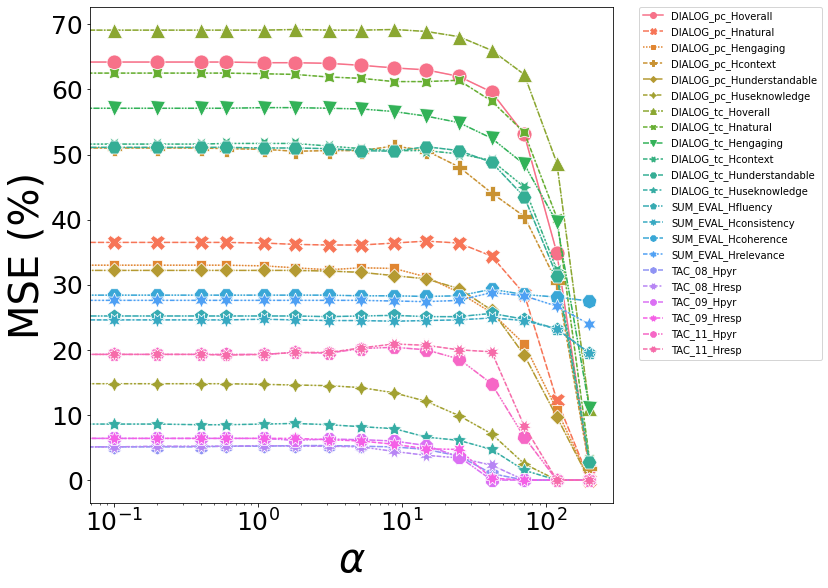

In [15]:
if True:
    fig,ax = plt.subplots(figsize=(11.7,8.27))
    ax = sns.lineplot(data=df_utt, x="alpha", y="mse", hue="human",style="human", markers=True, markersize=15)
    ax.set_xscale('log')
    plt.setp(ax.get_xticklabels(), fontsize=25,ha='center')
    plt.setp(ax.get_yticklabels(), fontsize=25)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('$\\alpha$', fontsize=40)
    plt.ylabel('MSE (%)', fontsize=40)
    plt.tight_layout()
    plt.savefig(f'all_agg_mse_error_utt.pdf', format = 'pdf')

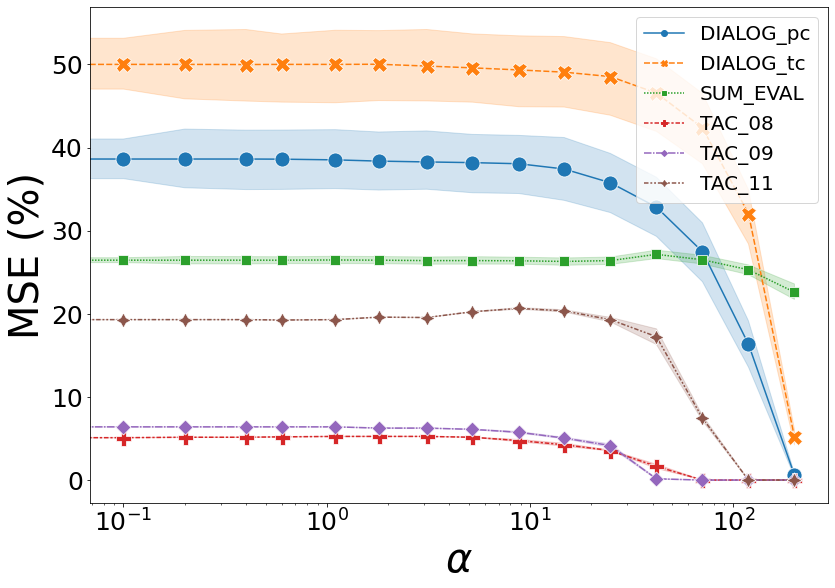

In [16]:
if True:
    fig,ax = plt.subplots(figsize=(11.7,8.27))
    ax = sns.lineplot(data=df_utt, x="alpha", y="mse", hue="ds", style="ds", markers=True, markersize=15)
    ax.set_xscale('log')
    plt.setp(ax.get_xticklabels(), fontsize=25,ha='center')
    plt.setp(ax.get_yticklabels(), fontsize=25)
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    lgd = plt.legend(prop={'size': 20})
    plt.xlabel('$\\alpha$', fontsize=40)
    plt.ylabel('MSE (%)', fontsize=40)
    plt.tight_layout()
    plt.savefig(f'agg_mse_error_utt.pdf', format = 'pdf')